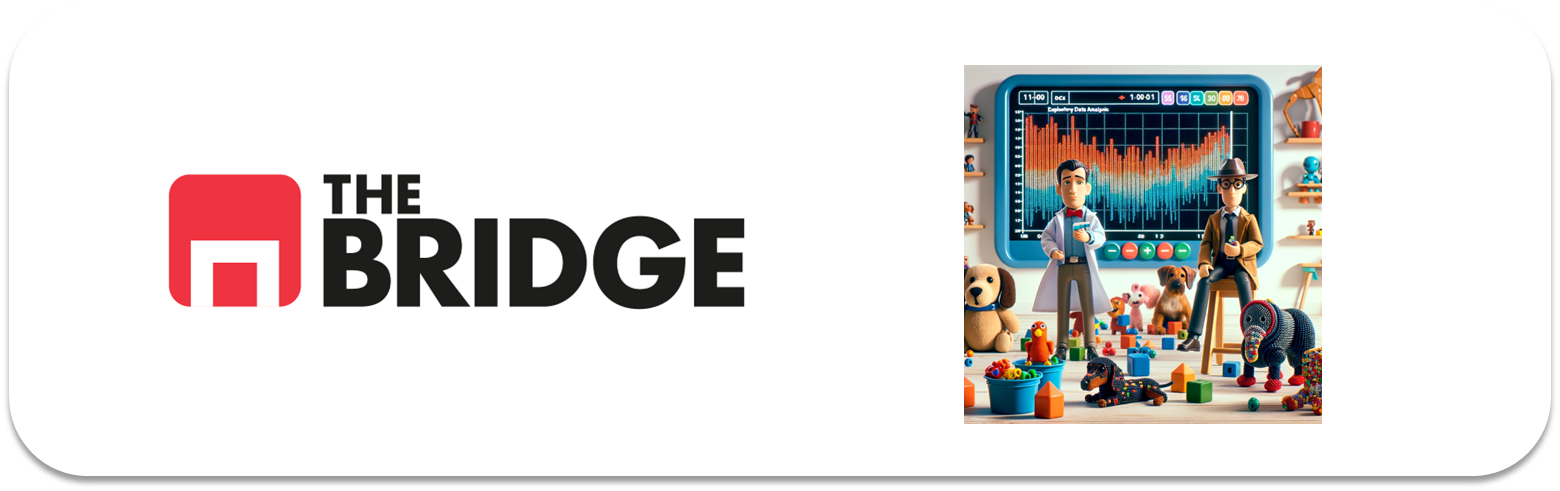

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency






## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [88]:
titanic_df = pd.read_csv('./data/titanic.csv')

titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [89]:
titanic_copy = titanic_df.copy()

columns_to_drop = ['deck', 'survived', 'pclass', 'embarked']
titanic_copy.drop(columns=columns_to_drop, inplace=True)

titanic_copy.head()


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [90]:
titanic_copy['family_members'] = titanic_copy['parch'] + titanic_copy['sibsp']

titanic_copy.drop(columns=['parch', 'sibsp'], inplace=True)

titanic_copy.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [91]:
moda_embark_town = titanic_copy['embark_town'].mode()[0]

titanic_copy['embark_town'] = titanic_copy['embark_town'].fillna(moda_embark_town)

titanic_copy['embark_town'].isnull().sum()


np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [92]:
titanic_copy['age'] = titanic_copy.groupby('who')['age'].transform(lambda group: group.fillna(group.mean()))


In [93]:
titanic_copy['age'].isnull().sum()


np.int64(0)

In [94]:
titanic_copy['age'].describe()


count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [95]:
# 1.
# Supervivencia absoluta y relativa por sexo
titanic_copy.groupby('sex')['alive'].value_counts(normalize=False)
titanic_copy.groupby('sex')['alive'].value_counts(normalize=True)

# Supervivencia por adulto o niño
titanic_copy.groupby(['who', 'alive']).size()


who    alive
child  no        34
       yes       49
man    no       449
       yes       88
woman  no        66
       yes      205
dtype: int64

<Axes: title={'center': 'Supervivencia absoluta por sexo'}, xlabel='Sexo', ylabel='Cantidad'>

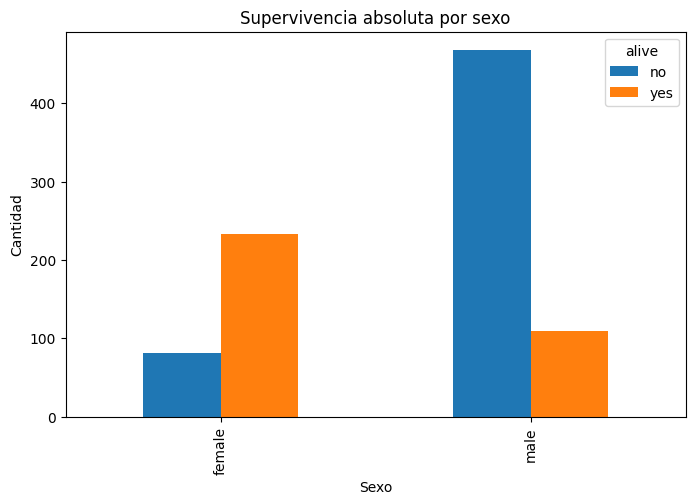

In [96]:
titanic_copy.groupby('sex')['alive'].value_counts(normalize=False).unstack().plot(
    kind='bar', figsize=(8, 5), title='Supervivencia absoluta por sexo', xlabel='Sexo', ylabel='Cantidad'
)


<Axes: title={'center': 'Supervivencia relativa por sexo'}, xlabel='Sexo', ylabel='Proporción'>

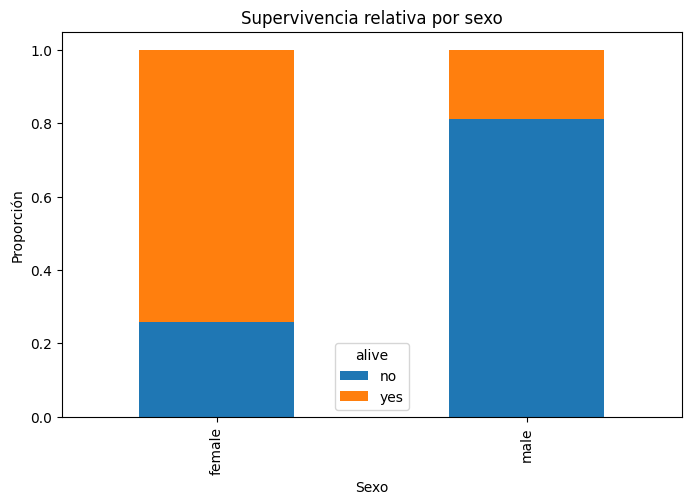

In [97]:
titanic_copy.groupby('sex')['alive'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, figsize=(8, 5), title='Supervivencia relativa por sexo', xlabel='Sexo', ylabel='Proporción'
)


In [ ]:
# Tabla de contingencia para sexo y supervivencia
contingencia_sexo = pd.crosstab(titanic_copy['sex'], titanic_copy['alive'])

# Test de Chi-cuadrado
chi2_sexo, p_sexo, dof_sexo, expected_sexo = chi2_contingency(contingencia_sexo)

print("Chi-cuadrado (sexo y supervivencia):", chi2_sexo)
print("P-valor:", p_sexo)


Chi-cuadrado (sexo y supervivencia): 260.71702016732104
P-valor: 1.1973570627755645e-58


In [99]:
# Absolute Werte:
absolute_who = titanic_copy.groupby(['who'])['alive'].value_counts(normalize=False)
print("Absolute Werte (Kind/Erwachsener):")
print(absolute_who)


Absolute Werte (Kind/Erwachsener):
who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64


In [100]:
relative_who = titanic_copy.groupby(['who'])['alive'].value_counts(normalize=True)
print("Relative Werte (Kind/Erwachsener):")
print(relative_who)


Relative Werte (Kind/Erwachsener):
who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64


In [101]:
# Tabla de contingencia para 'who' (adulto/niño) y supervivencia
contingencia_who = pd.crosstab(titanic_copy['who'], titanic_copy['alive'])

chi2_who, p_who, dof_who, expected_who = chi2_contingency(contingencia_who)

print("Chi-cuadrado (adulto/niño y supervivencia):", chi2_who)
print("P-valor:", p_who)


Chi-cuadrado (adulto/niño y supervivencia): 283.923050324233
P-valor: 2.2227620817798914e-62


Con los resultados obtenidos:

***Relación entre el sexo y la supervivencia***
Chi-cuadrado: 260.72
P-valor: 1.19e-58
El p-valor es extremadamente bajo (mucho menor que 0.05), lo que indica que existe una relación estadísticamente significativa entre el sexo y la supervivencia. Esto sugiere que las mujeres hayan tenido una mayor tasa de supervivencia. En los valores absolutos y relativos se puede ver muy bien, las mujeres tenía mas probabilidad de sobrevivir

***Relación entre ser adulto o niño y la supervivencia***
Chi-cuadrado: 283.92
P-valor: 2.22e-62
El p-valor es también extremadamente bajo, esto sugiere que los niños tuvieron mayores probabilidades de sobrevivir en comparación con los adultos. Los valores absolutos y relativos muestra una alta prioridad en el rescate para este grupo.

En los valores relativos se ve claramente que el porcentaje de mujeres que sobrevivieron es el más alto.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [102]:
absolute_class = titanic_copy.groupby('class')['alive'].value_counts(normalize=False)
print("Supervivencia absoluta por clase:")
print(absolute_class)


Supervivencia absoluta por clase:
class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64


In [103]:
relative_class = titanic_copy.groupby('class')['alive'].value_counts(normalize=True)
print("Supervivencia relativa por clase:")
print(relative_class)


Supervivencia relativa por clase:
class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64


In [104]:
contingencia_class = pd.crosstab(titanic_copy['class'], titanic_copy['alive'])

chi2_class, p_class, dof_class, expected_class = chi2_contingency(contingencia_class)

print("Chi-cuadrado (clase y supervivencia):", chi2_class)
print("P-valor:", p_class)


Chi-cuadrado (clase y supervivencia): 102.88898875696056
P-valor: 4.549251711298793e-23


**Conclusión absoluta**: En términos absolutos, la mayoría de los pasajeros que sobrevivieron viajaban en Primera clase (136 pasajeros), seguidos por la Tercera clase (119 pasajeros). Sin embargo, la Tercera clase también tiene el mayor número de no sobrevivientes (372 pasajeros).

**Conclusión relativa**: Proporcionalmente, los pasajeros de Primera clase tuvieron las mayores probabilidades de sobrevivir (62.96%), mientras que los pasajeros de Tercera clase tuvieron las menores probabilidades de sobrevivir (24.24%).

El p-valor es extremadamente bajo (mucho menor que 0.05), lo que indica que existe una relación estadísticamente significativa entre la clase en la que viajaban los pasajeros y la probabilidad de supervivencia.
Esto significa que la clase fue un factor determinante en la supervivencia de los pasajeros.

Los pasajeros de ***Primera clase*** tuvieron las **mayores probabilidades de sobrevivir** tanto en términos absolutos como relativos.
Los pasajeros de ***Tercera clase*** fueron los más afectados, con la mayor cantidad de no sobrevivientes y la **menor proporción de supervivencia**.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [105]:
absolute_city = titanic_copy.groupby('embark_town')['alive'].value_counts(normalize=False)
print("Supervivencia absoluta por ciudad de embarque:")
print(absolute_city)


Supervivencia absoluta por ciudad de embarque:
embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64


In [106]:
relative_city = titanic_copy.groupby('embark_town')['alive'].value_counts(normalize=True)
print("Supervivencia relativa por ciudad de embarque:")
print(relative_city)


Supervivencia relativa por ciudad de embarque:
embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64


In [107]:
contingencia_city = pd.crosstab(titanic_copy['embark_town'], titanic_copy['alive'])

chi2_city, p_city, dof_city, expected_city = chi2_contingency(contingencia_city)

print("Chi-cuadrado (ciudad de embarque y supervivencia):", chi2_city)
print("P-valor:", p_city)


Chi-cuadrado (ciudad de embarque y supervivencia): 25.964452881874784
P-valor: 2.3008626481449577e-06


**Conclusión absoluta:** En términos absolutos, Southampton tiene el mayor número de sobrevivientes (219), pero también el mayor número de no sobrevivientes (427). Esto se debe a que la mayoría de los pasajeros embarcaron en Southampton.

**Conclusión relativa:** Proporcionalmente, los pasajeros de Cherbourg tuvieron las mayores probabilidades de sobrevivir (55.36%), mientras que los pasajeros de Southampton tuvieron las menores probabilidades de sobrevivir (33.91%).

El p-valor es extremadamente bajo indica que existe una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.
Esto sugiere que la ciudad de embarque influyó en las probabilidades de sobrevivir, posiblemente debido a factores relacionados con las clases de los pasajeros que abordaron en cada ciudad.



4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [108]:
fare_mean = titanic_copy.groupby('alive')['fare'].mean()
print("Precio promedio del pasaje por supervivencia:")
print(fare_mean)


Precio promedio del pasaje por supervivencia:
alive
no     22.117887
yes    48.395408
Name: fare, dtype: float64


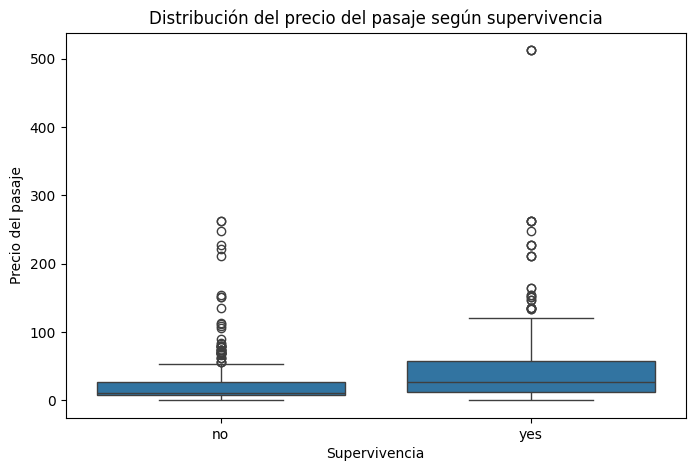

In [109]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_copy, x='alive', y='fare')
plt.title('Distribución del precio del pasaje según supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Precio del pasaje')
plt.show()


In [110]:
from scipy.stats import ttest_ind

# Dividir los precios del pasaje por supervivencia
fare_survived = titanic_copy[titanic_copy['alive'] == 'yes']['fare']
fare_not_survived = titanic_copy[titanic_copy['alive'] == 'no']['fare']

# Test t-student
t_stat, p_val = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print("T-statistic:", t_stat)
print("P-valor:", p_val)


T-statistic: 6.839099259085254
P-valor: 2.6993323503141236e-11


**Conclusión:** 
Los sobrevivientes, en promedio, pagaron un precio significativamente más alto por sus pasajes que los no sobrevivientes. Esto sugiere que los pasajeros con boletos más caros tenían mayores probabilidades de sobrevivir.

El boxplot muestra que la mediana del precio del pasaje es notablemente más alta para los sobrevivientes que para los no sobrevivientes.
Existen outliers en ambos grupos, pero son más prominentes entre los sobrevivientes.
La distribución de los precios del pasaje está más concentrada en valores bajos para los no sobrevivientes, mientras que los sobrevivientes tienen una mayor dispersión de precios, con muchos pagando tarifas significativamente más altas.

El p-valor es extremadamente bajo lo que muestra una diferencia estadísticamente significativa entre los precios promedio de los pasajes de los sobrevivientes y los no sobrevivientes.
Esto confirma que los pasajeros con ***boletos más caros*** tenían una ***mayor probabilidad de sobrevivir***.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [111]:
# Filtrar pasajeros con ticket gratis (fare = 0)
sin_pago = titanic_copy[titanic_copy['fare'] == 0]

print("Pasajeros que no pagaron el ticket:")
print(sin_pago[['sex', 'age', 'class', 'embark_town', 'alive']])


Pasajeros que no pagaron el ticket:
      sex        age   class  embark_town alive
179  male  36.000000   Third  Southampton    no
263  male  40.000000   First  Southampton    no
271  male  25.000000   Third  Southampton   yes
277  male  33.173123  Second  Southampton    no
302  male  19.000000   Third  Southampton    no
413  male  33.173123  Second  Southampton    no
466  male  33.173123  Second  Southampton    no
481  male  33.173123  Second  Southampton    no
597  male  49.000000   Third  Southampton    no
633  male  33.173123   First  Southampton    no
674  male  33.173123  Second  Southampton    no
732  male  33.173123  Second  Southampton    no
806  male  39.000000   First  Southampton    no
815  male  33.173123   First  Southampton    no
822  male  38.000000   First  Southampton    no


In [112]:
max_fare = titanic_copy['fare'].max()

persona_caro = titanic_copy[titanic_copy['fare'] == max_fare]

print("Información sobre la persona con el ticket más caro:")
print(persona_caro[['sex', 'age', 'class', 'embark_town', 'alive']])


Información sobre la persona con el ticket más caro:
        sex   age  class embark_town alive
258  female  35.0  First   Cherbourg   yes
679    male  36.0  First   Cherbourg   yes
737    male  35.0  First   Cherbourg   yes


Los pasajeros con ***tarifa 0*** podrían ser:

Tripulación: Podrían haber viajado como parte de la tripulación.
Acompañantes: Tal vez sus tickets estaban combinados con otros pasajeros (familias).
Pasajes gratuitos: En algunos casos, pasajeros viajaban como cortesía o excepciones.
***Bajas probabilidades de supervivencia***.


Persona con el ***ticket más caro:***

Precio máximo: El ticket más caro costó 512.33.
Tres personas compartieron este ticket, dos mujeres y un hombre, todos de clase First.

Posible explicación:
Estas personas probablemente compartieron un camarote de lujo, lo que justifica el alto precio del ticket. La combinación de primera clase, Cherbourg y camarote de lujo ***aumentó significativamente sus probabilidades de supervivencia***.



6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [113]:
fare_by_city_survival = titanic_copy.pivot_table(
    index='embark_town', 
    columns='alive', 
    values='fare', 
    aggfunc='mean'
)
print("Promedio del dinero pagado por ciudad y supervivencia:")
print(fare_by_city_survival)


Promedio del dinero pagado por ciudad y supervivencia:
alive               no        yes
embark_town                      
Cherbourg    35.443335  79.720926
Queenstown   13.335904  13.182227
Southampton  20.743987  39.916514


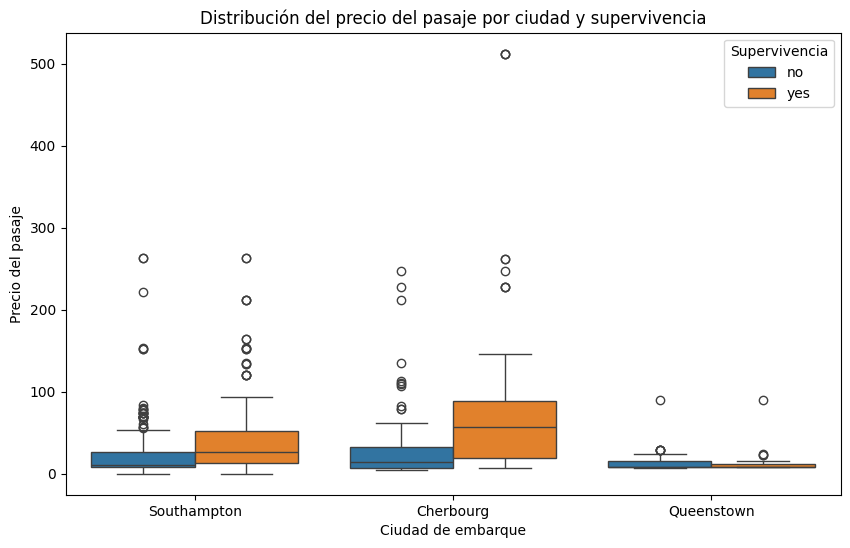

In [114]:
# Gráfico de caja para visualizar la distribución del precio del pasaje
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_copy, x='embark_town', y='fare', hue='alive')
plt.title('Distribución del precio del pasaje por ciudad y supervivencia')
plt.xlabel('Ciudad de embarque')
plt.ylabel('Precio del pasaje')
plt.legend(title='Supervivencia')
plt.show()


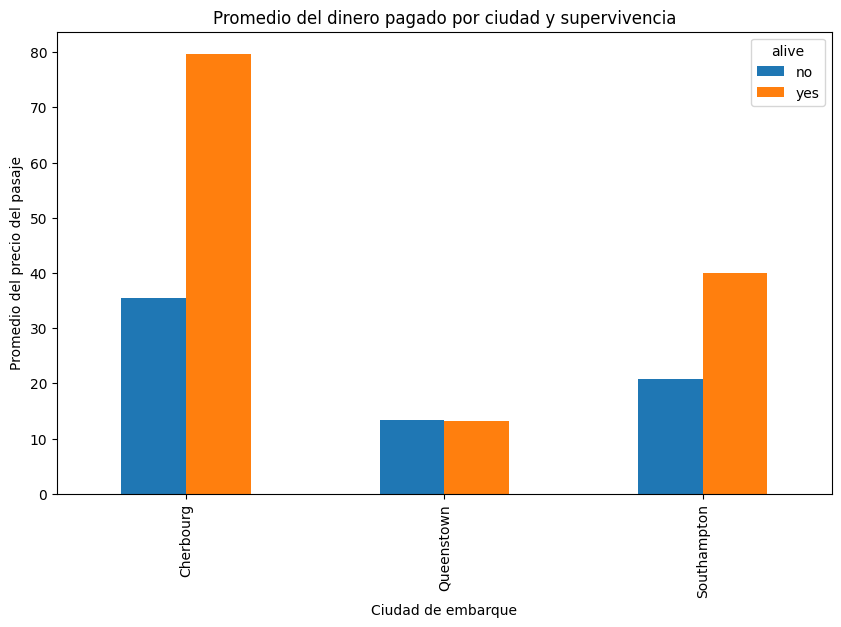

In [115]:
fare_by_city_survival.plot(kind='bar', figsize=(10, 6), title='Promedio del dinero pagado por ciudad y supervivencia')
plt.xlabel('Ciudad de embarque')
plt.ylabel('Promedio del precio del pasaje')
plt.show()


Los sobrevivientes pagaron tarifas promedio más altas que los no sobrevivientes en todas las ciudades, especialmente en Cherbourg.
En Queenstown, el promedio es similar para ambos grupos, lo que podría indicar que otros factores influyeron más en la supervivencia.

Gráfico de caja (boxplot):

Cherbourg:
Presenta una mayor dispersión en los precios, con sobrevivientes pagando tarifas significativamente más altas.
Queenstown:
Los precios son bajos y con poca dispersión, sin diferencias marcadas entre sobrevivientes y no sobrevivientes.
Southampton:
Existe una clara diferencia entre sobrevivientes (precios más altos) y no sobrevivientes (precios más bajos), aunque con menor dispersión en comparación con Cherbourg.

Gráfico de barras:

Cherbourg destaca con el precio promedio más alto entre los sobrevivientes.
Queenstown tiene promedios bajos tanto para sobrevivientes como para no sobrevivientes.
Southampton muestra una diferencia notable entre sobrevivientes y no sobrevivientes, aunque los precios promedio son más bajos que en Cherbourg.

**Conclusión general:**
Los pasajeros de *Cherbourg* pagaron *tarifas más altas en promedio*, lo que parece estar relacionado con una *mayor probabilidad de supervivencia*.
Los pasajeros de *Southampton* también muestran una relación entre precios más altos y mayor supervivencia, pero con tarifas más moderadas.
En *Queenstown*, los precios son *consistentemente bajos* y **no** parece haber una relación clara con la supervivencia.

Estas observaciones indican que la ciudad de embarque influye en la relación entre el dinero pagado y la supervivencia, probablemente debido a las clases sociales asociadas a cada ciudad.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


In [116]:
titanic_copy['age_group'] = pd.cut(
    titanic_copy['age'], 
    bins=[0, 12, 18, 35, 50, 80], 
    labels=['Niño', 'Adolescente', 'Joven adulto', 'Adulto medio', 'Mayor']
)

class_age_survival = titanic_copy.groupby(['class', 'age_group', 'alive'], observed=True)['alive'].count().unstack().fillna(0)
print("Supervivencia por clase y grupo de edad (absoluto, ohne NaN):")
print(class_age_survival)


Supervivencia por clase y grupo de edad (absoluto, ohne NaN):
alive                   no   yes
class  age_group                
First  Niño            1.0   3.0
       Adolescente     1.0  11.0
       Joven adulto   32.0  64.0
       Adulto medio   25.0  40.0
       Mayor          21.0  18.0
Second Niño            0.0  17.0
       Adolescente     6.0   6.0
       Joven adulto   60.0  45.0
       Adulto medio   19.0  16.0
       Mayor          12.0   3.0
Third  Niño           28.0  20.0
       Adolescente    33.0  13.0
       Joven adulto  254.0  80.0
       Adulto medio   48.0   5.0
       Mayor           9.0   1.0


In [117]:
class_age_relative = (
    titanic_copy.groupby(['class', 'age_group', 'alive'], observed=True)
    .size()
    .groupby(level=[0, 1])
    .apply(lambda x: x / x.sum())
    .unstack()
    .fillna(0)  # Optional: NaN durch 0 ersetzen, falls notwendig
)

print("Supervivencia por clase y grupo de edad (relativo):")
print(class_age_relative)


Supervivencia por clase y grupo de edad (relativo):
alive                                          no       yes
class  age_group    class  age_group                       
First  Niño         First  Niño          0.250000  0.750000
       Adolescente  First  Adolescente   0.083333  0.916667
       Joven adulto First  Joven adulto  0.333333  0.666667
       Adulto medio First  Adulto medio  0.384615  0.615385
       Mayor        First  Mayor         0.538462  0.461538
Second Niño         Second Niño          0.000000  1.000000
       Adolescente  Second Adolescente   0.500000  0.500000
       Joven adulto Second Joven adulto  0.571429  0.428571
       Adulto medio Second Adulto medio  0.542857  0.457143
       Mayor        Second Mayor         0.800000  0.200000
Third  Niño         Third  Niño          0.583333  0.416667
       Adolescente  Third  Adolescente   0.717391  0.282609
       Joven adulto Third  Joven adulto  0.760479  0.239521
       Adulto medio Third  Adulto medio  0.90566

C:\Users\kthfu\AppData\Local\Temp\ipykernel_18480\3579683350.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=[0, 1])


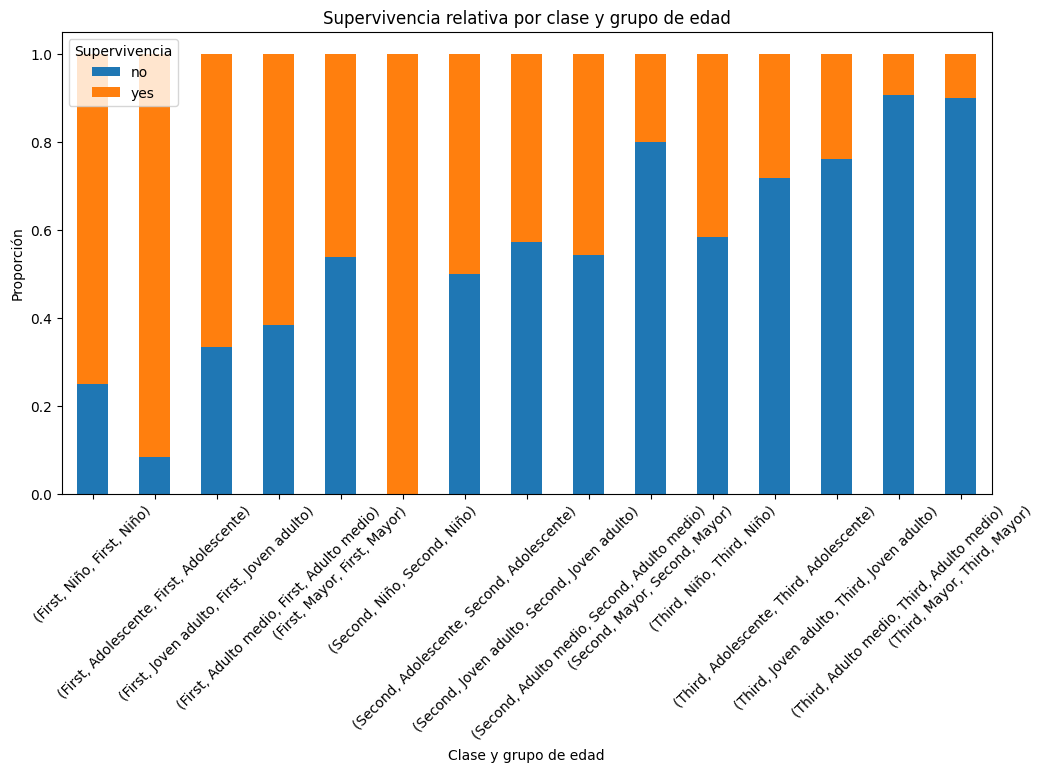

In [118]:
class_age_relative.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Supervivencia relativa por clase y grupo de edad')
plt.xlabel('Clase y grupo de edad')
plt.ylabel('Proporción')
plt.legend(title='Supervivencia')
plt.xticks(rotation=45)
plt.show()


La clase afecta significativamente la supervivencia:

**Primera clase** tiene tasas de ***supervivencia*** consistentemente **más altas**.
Tercera clase tiene la mayor proporción de fallecimientos, especialmente entre adultos jóvenes y mayores.
La edad también es un factor importante:

Los **niños** tienen tasas de **supervivencia más altas en todas las clases**.
Los **mayores** tienen tasas de **supervivencia muy bajas**, *especialmente* en la **segunda y tercera clase**.

***Grupos destacados:***
*Adolescentes en primera clase:* Grupo con la *mayor probabilidad de supervivencia*.
*Mayores en tercera clase:* Grupo con la *menor probabilidad de supervivencia*.

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

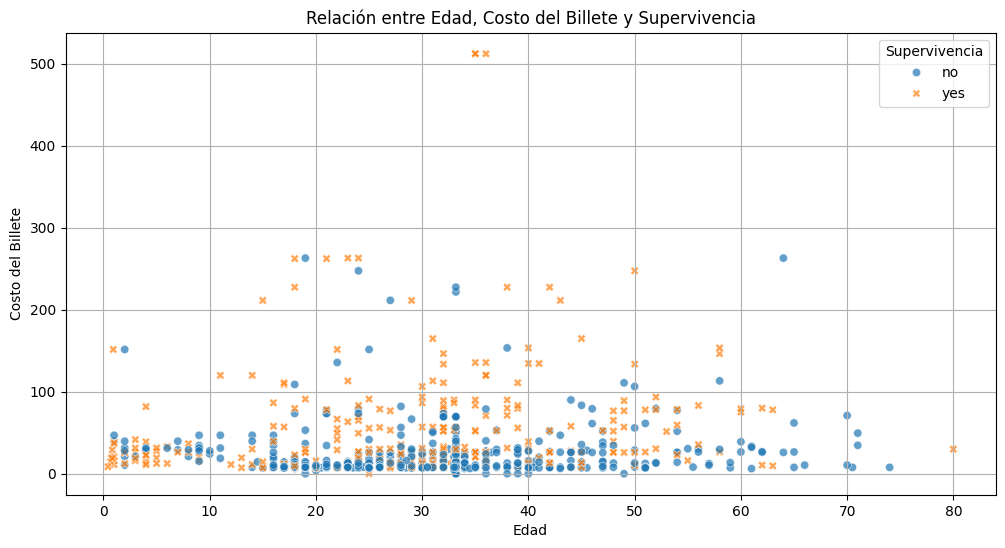

In [119]:
# Configuración del gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=titanic_copy, x="age", y="fare", hue="alive", style="alive", alpha=0.7)
plt.title("Relación entre Edad, Costo del Billete y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Costo del Billete")
plt.legend(title="Supervivencia", loc='upper right')
plt.grid()
plt.show()


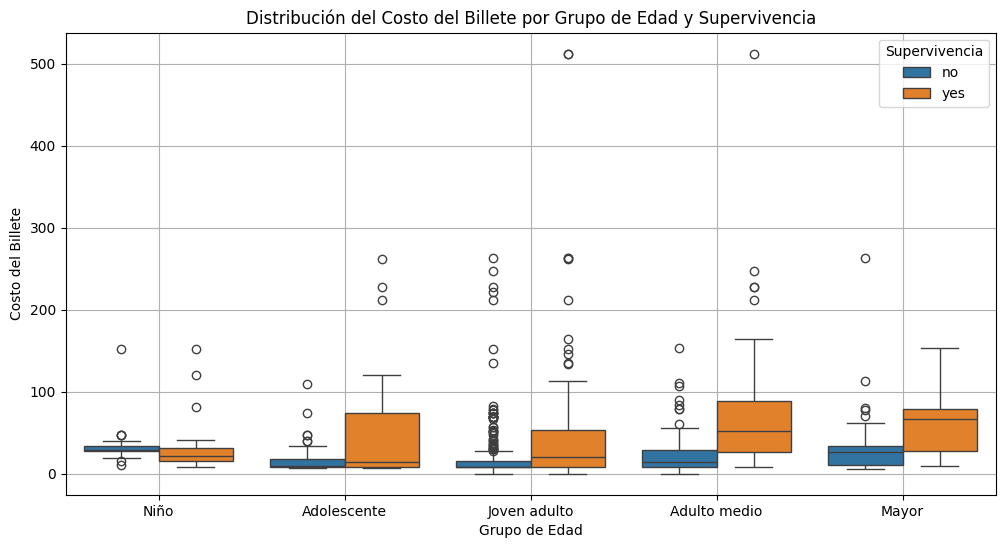

In [120]:
# Configuración del Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_copy, x="age_group", y="fare", hue="alive")
plt.title("Distribución del Costo del Billete por Grupo de Edad y Supervivencia")
plt.xlabel("Grupo de Edad")
plt.ylabel("Costo del Billete")
plt.legend(title="Supervivencia", loc='upper right')
plt.grid()
plt.show()


In [121]:
summary_stats = (
    titanic_copy.groupby(['age_group', 'alive'], observed=True)['fare']
    .describe()
)

print(summary_stats)



                    count       mean        std      min        25%      50%  \
age_group    alive                                                             
Niño         no      29.0  34.255890  24.227874  10.4625  27.900000  29.1250   
             yes     40.0  29.564688  28.046978   8.5167  15.860425  21.3000   
Adolescente  no      40.0  18.939900  20.585153   6.4958   7.790600  10.0000   
             yes     30.0  52.799863  70.826257   7.2250   8.050000  13.7271   
Joven adulto no     346.0  19.142483  31.897951   0.0000   7.775000   8.0500   
             yes    189.0  42.392857  66.421542   0.0000   8.662500  21.0000   
Adulto medio no      92.0  25.220696  26.438617   0.0000   8.018750  14.7500   
             yes     61.0  72.619470  82.944247   7.9250  25.929200  52.0000   
Mayor        no      42.0  34.478574  43.408580   6.2375  10.500000  26.2750   
             yes     22.0  61.027650  39.729981   9.5875  27.412500  67.3250   

                          75%       max

**Observaciones Generales:**
Hay una ***tendencia clara*** de que las personas que **pagaron más** por sus billetes tienen una ***mayor probabilidad de supervivencia***, **independientemente** del grupo de edad.
Los valores extremos (máximos) reflejan que las tarifas más altas corresponden a sobrevivientes, probablemente debido a una mayor representación en la primera clase.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [122]:
dataset_junio = pd.read_csv('./data/dataset_viajes_jun23.csv')

dataset_junio.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [123]:
print(dataset_junio.columns)


Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')


In [124]:
viajes_por_aircompany = dataset_junio['aircompany'].value_counts()
print("\nViajes por compañía aérea:")
print(viajes_por_aircompany)


Viajes por compañía aérea:
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64



Análisis descriptivo de ingresos por compañía aérea:
            count           mean            std       min          25%  \
aircompany                                                               
Airnar      100.0  405293.978200  269583.848420  14232.65  185270.6000   
FlyQ        108.0  401619.008056  295633.712828  23498.34  237556.9525   
MoldaviAir  133.0  548077.209098  374577.838426  11797.85  178872.9000   
PamPangea   117.0  478417.048718  364458.092328  12383.21  163124.5300   
TabarAir    142.0  271042.230282  177006.035877  24289.53   95620.5075   

                   50%          75%         max  
aircompany                                       
Airnar      396764.220  608356.1225   958617.02  
FlyQ        366970.685  473901.4325  1081702.91  
MoldaviAir  532426.220  794055.4100  1295515.83  
PamPangea   442668.520  763079.0200  1083591.01  
TabarAir    258379.745  398147.1925   623089.41  


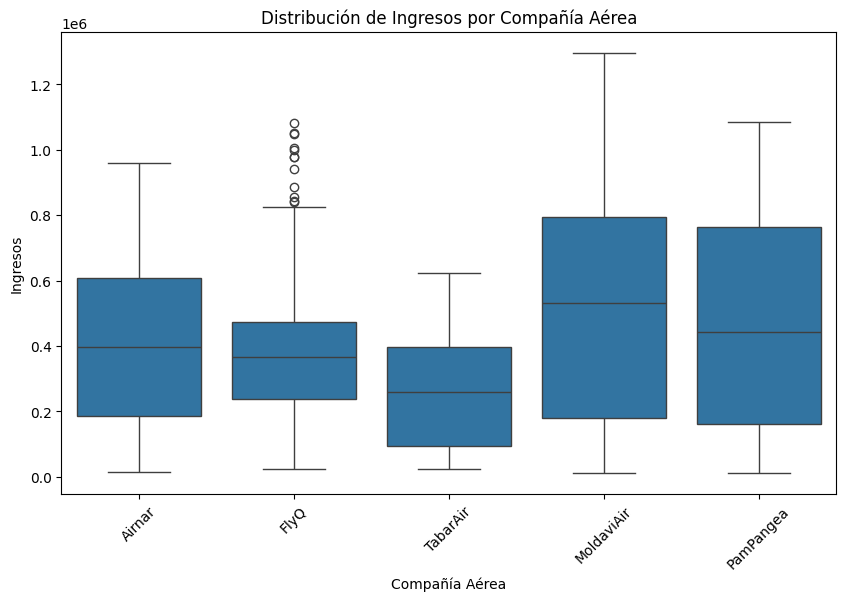

In [125]:
ingresos_por_aircompany = dataset_junio.groupby('aircompany')['ingresos'].describe()
print("\nAnálisis descriptivo de ingresos por compañía aérea:")
print(ingresos_por_aircompany)


plt.figure(figsize=(10, 6))
sns.boxplot(x='aircompany', y='ingresos', data=dataset_junio)
plt.title('Distribución de Ingresos por Compañía Aérea')
plt.xticks(rotation=45)
plt.xlabel('Compañía Aérea')
plt.ylabel('Ingresos')
plt.show()


Número de viajes por compañía aérea: 

***TabarAir*** es la compañía con ***más viajes realizados (142)***, seguida de MoldaviAir (133) y PamPangea (117). Airnar y FlyQ tienen menor número de vuelos.

Análisis *descriptivo de ingresos por compañía aérea*:
MoldaviAir tiene el ingreso promedio más alto ($548,077.21) y también el valor máximo ($1,295,515.83), lo que indica que sus vuelos probablemente tienen precios altos o están asociados a rutas premium.
***TabarAir***, aunque tiene más viajes, presenta ***ingresos promedio más bajos ($271,042.23)***, lo que podría implicar que sus vuelos tienen tarifas más económicas.
FlyQ y Airnar tienen ingresos similares y se encuentran en un rango medio.
PamPangea muestra ingresos altos, cercanos a MoldaviAir.

Distribución *gráfica de ingresos*:
MoldaviAir y PamPangea presentan las mayores distribuciones de ingresos, lo que confirma su predominancia en vuelos de mayor costo.

***TabarAir*** tiene una distribución más baja y compacta, reforzando que ofrece vuelos económicos.
FlyQ y Airnar presentan datos intermedios con una dispersión más moderada.


***Conclusión:***
***TabarAir*** domina en número de vuelos pero ***no*** en ingresos, lo que puede ser una estrategia de ofrecer vuelos económicos, incluir otros destinos, etc.
MoldaviAir y PamPangea destacan como compañías con ingresos significativamente altos, lo que sugiere que operan en rutas o mercados de mayor nivel adquisitivo.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

Estadísticas descriptivas para ingresos, distancia y consumo_kg:
           ingresos     distancia     consumo_kg
count  6.000000e+02    600.000000     600.000000
mean   4.187689e+05   8071.003333   68240.520508
std    3.182858e+05   5550.244086   67441.849592
min    1.179785e+04    344.000000     835.920000
25%    1.627668e+05   3073.000000   15733.520400
50%    3.754817e+05   6877.000000   36033.998000
75%    6.188420e+05  12553.000000  111717.652800
max    1.295516e+06  20029.000000  264876.314560

Matriz de correlación:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000


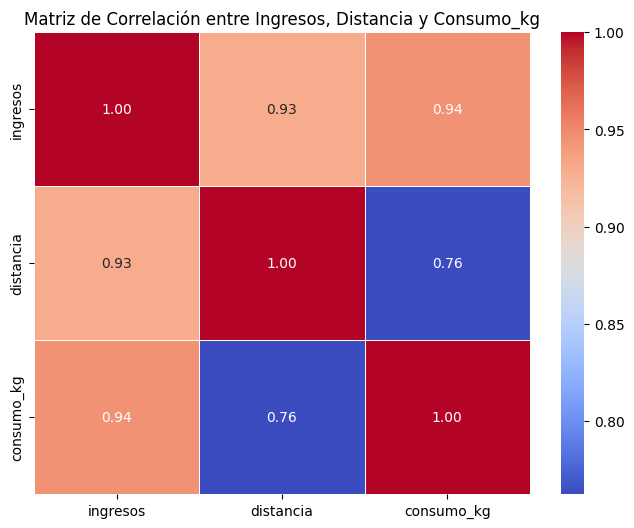

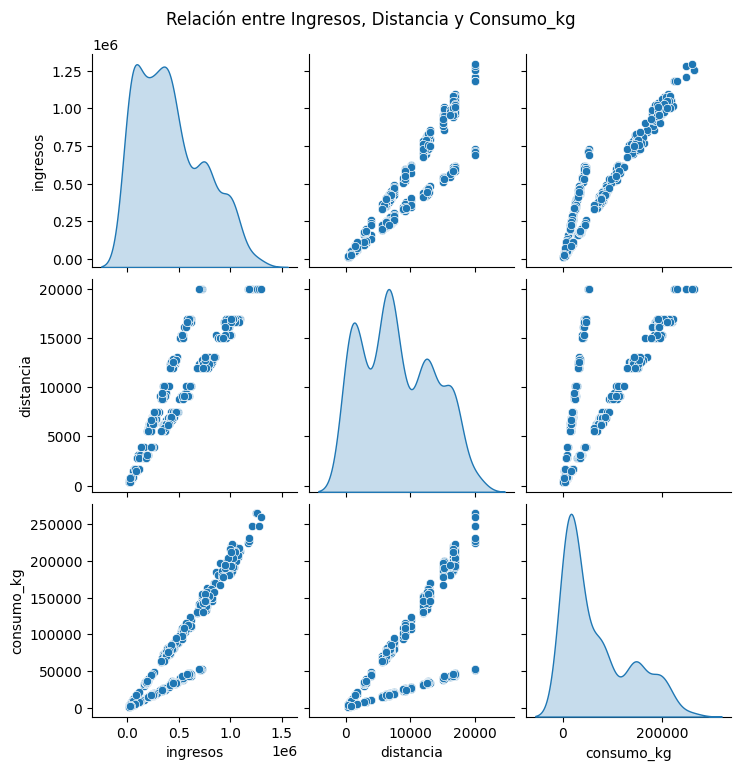

In [126]:
summary_stats = dataset_junio[['ingresos', 'distancia', 'consumo_kg']].describe()
print("Estadísticas descriptivas para ingresos, distancia y consumo_kg:")
print(summary_stats)

# Matriz de correlación entre las variables
correlation_matrix = dataset_junio[['ingresos', 'distancia', 'consumo_kg']].corr()
print("\nMatriz de correlación:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Ingresos, Distancia y Consumo_kg")
plt.show()

sns.pairplot(dataset_junio, vars=['ingresos', 'distancia', 'consumo_kg'], diag_kind="kde")
plt.suptitle("Relación entre Ingresos, Distancia y Consumo_kg", y=1.02)
plt.show()


***Estatistica descriptiva***:
Los datos muestran que el consumo de combustible también es variable y parece estar relacionado con las distancias y los aviones usados.

***Matriz de correlación***:
Ingresos vs Distancia (0.93):
Existe una correlación fuerte y positiva. Los vuelos de mayor distancia tienden a generar más ingresos.
Ingresos vs Consumo (0.94):
También hay una fuerte correlación entre los ingresos y el consumo de combustible, lo que implica que los vuelos más largos o con más peso generan mayores ingresos.
Distancia vs Consumo (0.76):
La relación es positiva pero más débil que las anteriores, sugiriendo que el consumo no solo depende de la distancia, sino también de factores como el modelo del avión o las escalas.

***Heatmap (Mapa de calor)***:

Refuerza las relaciones identificadas en la matriz de correlación. Los ingresos están estrechamente relacionados tanto con la distancia como con el consumo de combustible.

***Pairplot (Gráfico de pares)***:

Confirma visualmente las tendencias:
A medida que aumenta la distancia, también lo hacen los ingresos y el consumo.
Las distribuciones muestran algunos valores atípicos en ingresos y consumo.


**Conclusiones**
Relaciones clave:

Los ingresos están directamente influenciados por la distancia y el consumo. Las rutas más largas generan más ingresos pero también requieren un mayor consumo de combustible.


***Patrón prometedor***:

Para optimizar ingresos, es importante analizar las rutas más largas que también sean económicamente viables considerando el consumo. Esto puede implicar ajustes en los precios o en la eficiencia del combustible.


Lo que parece más prometedor en este análisis es la fuerte correlación entre los ingresos y el consumo de combustible (0.94). Este patrón indica que los vuelos con mayores consumos de combustible tienden a generar más ingresos, lo cual puede deberse a:

Rutas de larga distancia: 
Estas tienden a ser más costosas para los pasajeros y, por tanto, generan más ingresos.

Mayor capacidad de carga: Los vuelos que transportan más peso (carga o pasajeros) pueden consumir más combustible, pero también tienen mayor potencial de ingresos.

Modelos de aviones específicos: Algunos aviones más grandes, con mayor capacidad de carga, podrían estar operando en estas rutas más rentables.


Este ***patrón es prometedor*** porque sugiere que existe una oportunidad para:

**Optimizar rutas**: Identificar vuelos con altos ingresos y explorar formas de reducir costos operativos (como el consumo de combustible).
**Incrementar eficiencia**: Invertir en tecnologías o estrategias que reduzcan el consumo sin afectar los ingresos generados.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?


Distribución de vuelos por categoría:
cat_vuelo
Medio        204
Corto        176
Largo        114
Muy Largo    106
Name: count, dtype: int64

Estadísticas descriptivas por categoría de vuelo:
          ingresos                                                        \
             count           mean            std        min          25%   
cat_vuelo                                                                  
Corto        176.0   74065.190455   58724.151382   11797.85   26827.7000   
Medio        204.0  347153.983137   99953.028827  193746.39  252155.4100   
Largo        114.0  656525.937544  154482.367596  343046.25  466026.9125   
Muy Largo    106.0  873230.829623  219483.758015  508746.33  613608.3450   

                                                consumo_kg                 \
                  50%           75%         max      count           mean   
cat_vuelo                                                                   
Corto       51958.385  1.063700e+05   2562

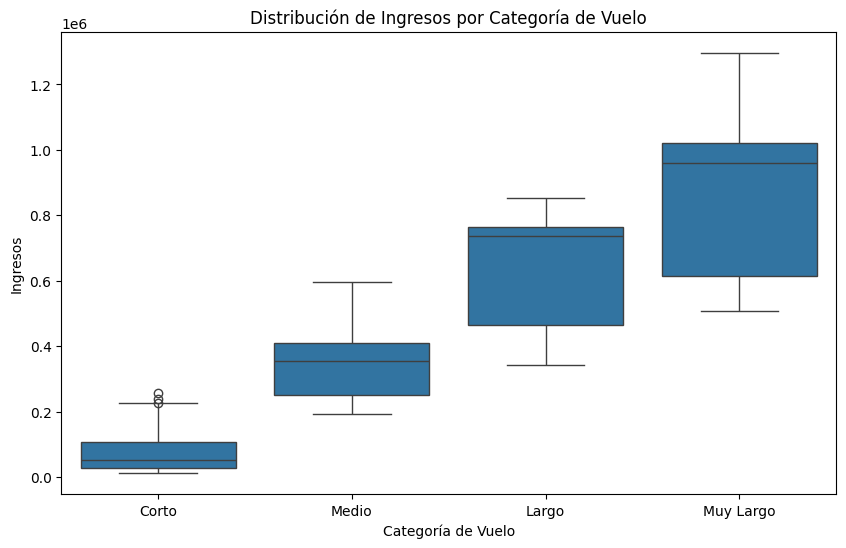

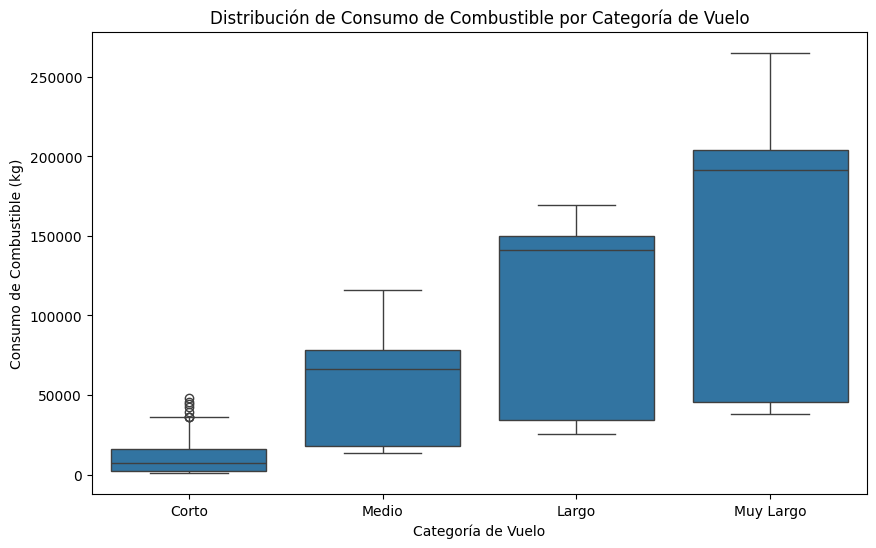

In [127]:
# Crear categorías para 'distancia'
bins = [0, 5000, 10000, 15000, dataset_junio['distancia'].max()]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']
dataset_junio['cat_vuelo'] = pd.cut(dataset_junio['distancia'], bins=bins, labels=labels)

print("\nDistribución de vuelos por categoría:")
print(dataset_junio['cat_vuelo'].value_counts())

summary_stats = dataset_junio.groupby('cat_vuelo', observed=True)[['ingresos', 'consumo_kg']].describe()
print("\nEstadísticas descriptivas por categoría de vuelo:")
print(summary_stats)


plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_vuelo', y='ingresos', data=dataset_junio)
plt.title("Distribución de Ingresos por Categoría de Vuelo")
plt.xlabel("Categoría de Vuelo")
plt.ylabel("Ingresos")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_vuelo', y='consumo_kg', data=dataset_junio)
plt.title("Distribución de Consumo de Combustible por Categoría de Vuelo")
plt.xlabel("Categoría de Vuelo")
plt.ylabel("Consumo de Combustible (kg)")
plt.show()


**Conclusiones**:

Los vuelos más largos (Largo y Muy Largo) son los que generan mayores ingresos y consumen más combustible. Esto sugiere que estos vuelos tienen una mayor rentabilidad en términos absolutos, pero probablemente también conllevan mayores costos operativos debido al consumo elevado.
Los vuelos cortos, aunque tienen ingresos y consumo bajos, podrían ser más frecuentes, lo que puede contribuir a su sostenibilidad en términos de operaciones.

La *categoría de vuelos* es un ***indicador significativo*** tanto para los *ingresos como para el consumo*, y podría ser un ***factor clave*** en la *planificación estratégica y operativa* de la aerolínea.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.